# KoNLPy - 한글 자연어 처리

In [7]:
# KoNLPy 설치 KoNLPy 설치
!pip install konlpy

In [8]:
!ls -l

total 3144
-rw-r--r--  1 chan  staff     1783 Mar 22 19:05 01_NLTK.ipynb
-rw-r--r--@ 1 chan  staff  1569882 Mar 23 22:08 02_WordCloud.ipynb
-rw-r--r--  1 chan  staff     3534 Mar 23 22:09 03_Konlpy.ipynb
-rw-r--r--@ 1 chan  staff    26756 Mar 23 22:11 04_한글형태소분석.ipynb
drwxr-xr-x  7 chan  staff      224 Mar 22 21:56 data


In [9]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

/bin/sh: apt-get: command not found
/usr/share/fonts: skipping, no such directory
/System/Library/Fonts: caching, new cache contents: 861 fonts, 1 dirs
/System/Library/Fonts/Supplemental: caching, new cache contents: 482 fonts, 0 dirs
/Library/Fonts: caching, new cache contents: 1 fonts, 0 dirs
/Users/chan/Library/Fonts: caching, new cache contents: 23 fonts, 0 dirs
/System/Library/AssetsV2/com_apple_MobileAsset_Font6: caching, new cache contents: 0 fonts, 1 dirs
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/ee9e9584cd1a5f676e03a9efcc80783bc7e12e2c.asset: caching, new cache contents: 0 fonts, 2 dirs
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/ee9e9584cd1a5f676e03a9efcc80783bc7e12e2c.asset/AssetData: caching, new cache contents: 3 fonts, 0 dirs
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/ee9e9584cd1a5f676e03a9efcc80783bc7e12e2c.asset/META-INF: caching, new cache contents: 0 fonts, 0 dirs
/Users/chan/.local/share/fonts: skipping, no such directory
/Users/chan/.fo

- 여기까지 실행한 후 런타임>런타임 다시시작
- 다시 시작한 후에는 아래 한글 말뭉치부터 실행

### 한글 말뭉치

In [7]:
from konlpy.corpus import kolaw, kobill

c = kolaw.open('constitution.txt').read()
d = kobill.open('1809890.txt').read()

### 한글 형태소 분석기

In [8]:
from konlpy.tag import *

han = Hannanum()
kkma = Kkma()
okt = Okt()

In [9]:
c[:40]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로'

- 명사 추출

In [10]:
han.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [11]:
print(kkma.nouns(c[:40]))

['대한', '대한민국', '대한민국헌법', '민국', '헌법', '유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동']


In [12]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

- 형태소 추출

In [13]:
print(han.morphs(c[:40]))

['대한민국헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛', '나는', '우리', '대한국민', '은', '3·1운동', '으로']


In [14]:
print(kkma.morphs(c[:40]))

['대한민국', '헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리', '대하', 'ㄴ', '국민', '은', '3', '·', '1', '운동', '으로']


In [15]:
print(okt.morphs(c[:40]))

['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로']


- 품사 부착

In [16]:
print(han.pos(c[:40]))

[('대한민국헌법', 'N'), ('유구', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('역사', 'N'), ('와', 'J'), ('전통', 'N'), ('에', 'J'), ('빛', 'N'), ('나는', 'J'), ('우리', 'N'), ('대한국민', 'N'), ('은', 'J'), ('3·1운동', 'N'), ('으로', 'J')]


In [17]:
print(kkma.pos(c[:40]))

[('대한민국', 'NNG'), ('헌법', 'NNG'), ('유구', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKM'), ('빛나', 'VV'), ('는', 'ETD'), ('우리', 'NNM'), ('대하', 'VV'), ('ㄴ', 'ETD'), ('국민', 'NNG'), ('은', 'JX'), ('3', 'NR'), ('·', 'SP'), ('1', 'NR'), ('운동', 'NNG'), ('으로', 'JKM')]


In [18]:
print(okt.pos(c[:40]))

[('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('·', 'Punctuation'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa')]


In [19]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### NLTK 활용

In [20]:
from nltk import Text


In [21]:
kolaw = Text(okt.nouns(c), name='kolaw')

In [22]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
%matplotlib inline

In [23]:
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

nanum_font number: 5


In [24]:
plt.rc('font', family='NanumBarunGothic') 

sions/3.8/lib/python3.8/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Libr

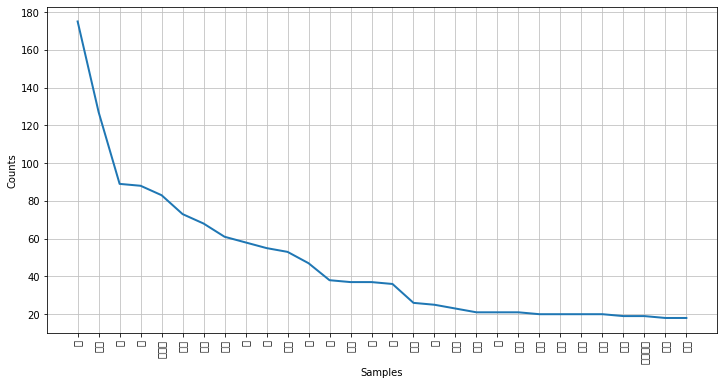

In [25]:
plt.figure(figsize=(12,6))
kolaw.plot(30)
plt.show()

### 워드 클라우드

In [26]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'